In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pymongo

client = pymongo.MongoClient("127.0.0.1:27017")
data = client["things2"]["things2"].find({'events.p.features':{'$exists': True}}, {'_id': 0, 'events.p.thingId': 1, 'events.p._timestamp': 1, 'events.p.features': 1})


In [6]:
av101 = []
xdk = []
other = []
counter = 0
for x in data:
    info = {'thingId': x['events'][0]['p']['thingId'], 'ts': x['events'][0]['p']['_timestamp']}
    if info['thingId'] == 'av101:compressor1':
        for f in x['events'][0]['p']['features']:
            info[f] =  x['events'][0]['p']['features'][f]['properties']['value']
        av101.append(info)
    elif info['thingId'] == 'av101:XDK_01':
        for f in x['events'][0]['p']['features']:
            if 'value' in x['events'][0]['p']['features'][f]['properties']['status']:
                info[f] = x['events'][0]['p']['features'][f]['properties']['status']['value']['currentMeasured']['value']
            else:
                info[f'{f}.x'] = x['events'][0]['p']['features'][f]['properties']['status']['x']
                info[f'{f}.y'] = x['events'][0]['p']['features'][f]['properties']['status']['y']
                info[f'{f}.z'] = x['events'][0]['p']['features'][f]['properties']['status']['z']
        xdk.append(info)
    else:
        other.append(x) 
print(len(other))

0


In [7]:
df = pd.DataFrame(av101)
df.head()

,thingId,ts,S_SUM,I_SUM,H_TDH_I_L3_N,U_L3_L1,H_TDH_I_L1_N,C_phi_L1,RealEd_SUM,P_L2,...,ReacE_L1,RealE_SUM,AE_SUM,S_L3,H_TDH_U_L3_N,S_L2,S_L1,H_TDH_U_L1_N,U_L1_N,ReacE_SUM
0,av101:compressor1,2022-04-01T22:03:48.902366584Z,126492.63,0.85,57.56,411.28,47.89,0.97,0,34636.20,...,12350663,175474032,199361376,40648.13,6.87,40319.07,45525.43,6.27,237.84,36483944
1,av101:compressor1,2022-04-01T22:03:49.914581617Z,127120.84,0.91,53.89,412.16,48.15,0.97,0,35852.80,...,12350666,175474064,199361408,41287.61,7.41,41523.16,44310.08,7.01,238.43,36483952
2,av101:compressor1,2022-04-01T22:03:50.889143832Z,129115.84,0.86,56.19,410.82,46.70,0.98,0,35375.59,...,12350668,175474096,199361440,41679.52,6.82,40978.16,46458.17,6.25,237.63,36483960
3,av101:compressor1,2022-04-01T22:03:51.904058425Z,127855.45,1.03,53.66,412.70,48.94,0.98,0,34840.50,...,12350671,175474128,199361472,42743.32,6.86,40901.21,44210.91,6.59,238.55,36483968
4,av101:compressor1,2022-04-01T22:03:52.909431008Z,128682.84,0.93,56.82,410.92,47.15,0.98,0,35342.48,...,12350674,175474144,199361520,41432.55,6.80,40921.10,46329.19,6.27,237.67,36483976


In [8]:
df2 = pd.DataFrame(xdk)
df2.head()

,thingId,ts,acceleration.x,acceleration.y,acceleration.z,magneticStrength.x,magneticStrength.y,magneticStrength.z,illuminance,rotation.x,rotation.y,rotation.z,temperature,humidity,pressure
0,av101:XDK_01,2022-04-01T22:03:49.055564626Z,-92,-948,-67,97,16,-11,0,122,-305,244,16.711,48,101418
1,av101:XDK_01,2022-04-01T22:03:50.052389515Z,-89,-947,-66,76,13,-47,0,183,183,0,16.701,48,101420
2,av101:XDK_01,2022-04-01T22:03:51.041808922Z,-97,-945,-63,86,16,-8,0,183,-61,61,16.711,48,101427
3,av101:XDK_01,2022-04-01T22:03:52.043661741Z,-84,-950,-64,86,11,-52,0,0,0,-61,16.721,48,101426
4,av101:XDK_01,2022-04-01T22:03:53.049854049Z,-92,-951,-67,82,14,2,0,0,-183,-61,16.711,48,101429


In [9]:
df.to_csv("data/mongo_av101_data.csv")
df2.to_csv("data/mongo_xdk_data.csv")

In [8]:
df = pd.read_csv("data/mongo_av101_data", index_col='ts')
df = df.drop('Unnamed: 0', 1)
df.index = pd.to_datetime(df.index)
print(df.shape) 
df.tail()

C:\Users\pedro\AppData\Local\Temp\ipykernel_16344\3562953551.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0', 1)


(1102186, 62)


,thingId,S_SUM,I_SUM,H_TDH_I_L3_N,U_L3_L1,H_TDH_I_L1_N,C_phi_L1,RealEd_SUM,P_L2,P_L1,...,ReacE_L1,RealE_SUM,AE_SUM,H_TDH_U_L3_N,S_L3,S_L2,S_L1,H_TDH_U_L1_N,U_L1_N,ReacE_SUM
ts,,,,,,,,,,,,,,,,,,,,,
2022-04-14 08:46:47.282290703+00:00,av101:compressor1,219.11,0.93,115.53,409.18,100.0,0.0,0,0.0,0.0,...,14098948,197559088,224485360,2.80,219.11,0.0,0.0,2.76,236.41,41034176
2022-04-14 08:46:49.848441542+00:00,av101:compressor1,221.12,0.93,117.37,409.12,100.0,0.0,0,0.0,0.0,...,14098948,197559088,224485360,2.81,221.12,0.0,0.0,2.77,236.38,41034176
2022-04-14 08:46:50.245383641+00:00,av101:compressor1,223.79,0.95,123.69,408.73,100.0,0.0,0,0.0,0.0,...,14098948,197559088,224485360,2.81,223.79,0.0,0.0,2.76,236.19,41034176
2022-04-14 08:46:52.839615327+00:00,av101:compressor1,222.40,0.94,120.35,409.37,100.0,0.0,0,0.0,0.0,...,14098948,197559088,224485360,2.84,222.40,0.0,0.0,2.80,236.47,41034176
2022-04-14 08:46:53.752384841+00:00,av101:compressor1,211.73,0.89,132.29,406.54,100.0,0.0,0,0.0,0.0,...,14098948,197559088,224485360,2.86,211.73,0.0,0.0,2.73,235.33,41034176


In [9]:
def unique_cols(df):
    a = df.to_numpy() # df.values (pandas<0.24)
    return (a[0] == a).all(0)

df = df.loc[:,np.invert(unique_cols(df))]
print(df.shape)
df.tail()

(1102186, 56)


,S_SUM,I_SUM,H_TDH_I_L3_N,U_L3_L1,H_TDH_I_L1_N,C_phi_L1,P_L2,P_L1,P_L3,ReacEc_L1,...,ReacE_L1,RealE_SUM,AE_SUM,H_TDH_U_L3_N,S_L3,S_L2,S_L1,H_TDH_U_L1_N,U_L1_N,ReacE_SUM
ts,,,,,,,,,,,,,,,,,,,,,
2022-04-14 08:46:47.282290703+00:00,219.11,0.93,115.53,409.18,100.0,0.0,0.0,0.0,139.78,112.64,...,14098948,197559088,224485360,2.80,219.11,0.0,0.0,2.76,236.41,41034176
2022-04-14 08:46:49.848441542+00:00,221.12,0.93,117.37,409.12,100.0,0.0,0.0,0.0,140.10,112.64,...,14098948,197559088,224485360,2.81,221.12,0.0,0.0,2.77,236.38,41034176
2022-04-14 08:46:50.245383641+00:00,223.79,0.95,123.69,408.73,100.0,0.0,0.0,0.0,137.66,112.64,...,14098948,197559088,224485360,2.81,223.79,0.0,0.0,2.76,236.19,41034176
2022-04-14 08:46:52.839615327+00:00,222.40,0.94,120.35,409.37,100.0,0.0,0.0,0.0,138.37,112.64,...,14098948,197559088,224485360,2.84,222.40,0.0,0.0,2.80,236.47,41034176
2022-04-14 08:46:53.752384841+00:00,211.73,0.89,132.29,406.54,100.0,0.0,0.0,0.0,126.35,112.64,...,14098948,197559088,224485360,2.86,211.73,0.0,0.0,2.73,235.33,41034176


In [ ]:
# Plot
fig, axes = plt.subplots(nrows=39, ncols=1, dpi=120, figsize=(20,192))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=12)

plt.tight_layout();

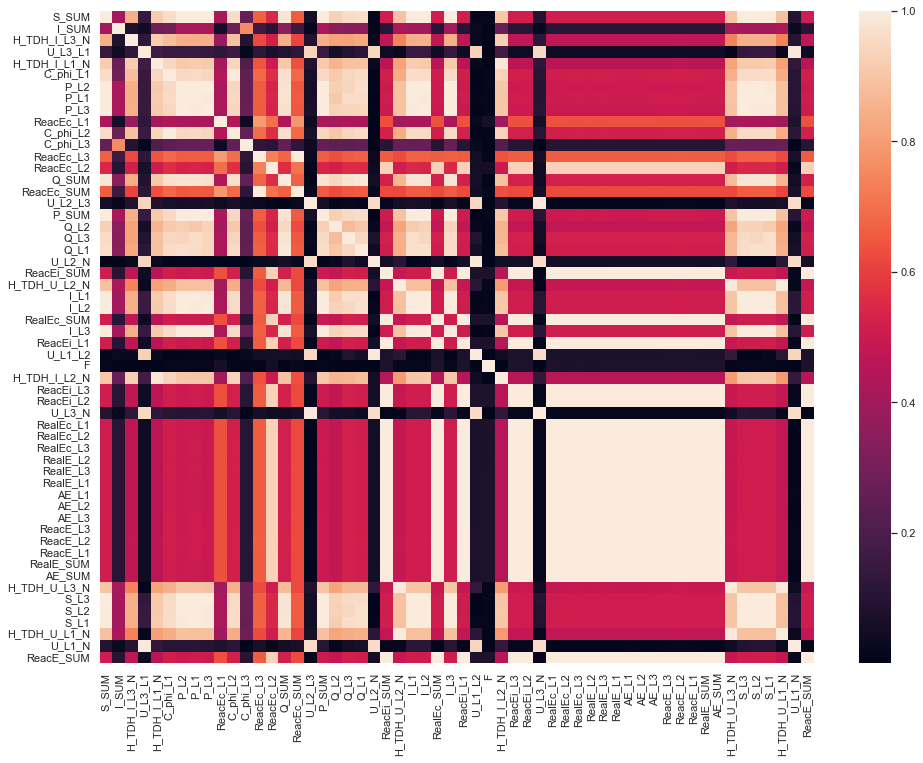

In [10]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16, 12)})
corr_matrix = df.corr().abs()
ax = sns.heatmap(corr_matrix)


In [11]:
def create_corr_group(corr, threshold=0.9):
    # Select upper triangle of correlation matrix
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    groups = {}
    for ind in range(len(upper.columns)):
        found = False
        col = upper.columns[ind]
        for g in groups:
            val = upper[col][g[1]]
            if val >= threshold:
                groups[g].append(col)
                found = True
                break
        if not found:
            groups[(col, ind)] = [col]
    return groups

corr_groups = create_corr_group(corr_matrix, threshold=0.90)

In [12]:
corr_groups

{('S_SUM', 0): ['S_SUM',
  'H_TDH_I_L1_N',
  'C_phi_L1',
  'P_L2',
  'P_L1',
  'P_L3',
  'C_phi_L2',
  'Q_SUM',
  'P_SUM',
  'Q_L2',
  'Q_L3',
  'Q_L1',
  'I_L1',
  'I_L2',
  'I_L3',
  'H_TDH_I_L2_N',
  'S_L3',
  'S_L2',
  'S_L1'],
 ('I_SUM', 1): ['I_SUM'],
 ('H_TDH_I_L3_N', 2): ['H_TDH_I_L3_N'],
 ('U_L3_L1', 3): ['U_L3_L1',
  'U_L2_L3',
  'U_L2_N',
  'U_L1_L2',
  'U_L3_N',
  'U_L1_N'],
 ('ReacEc_L1', 9): ['ReacEc_L1'],
 ('C_phi_L3', 11): ['C_phi_L3'],
 ('ReacEc_L3', 12): ['ReacEc_L3', 'ReacEc_SUM'],
 ('ReacEc_L2', 13): ['ReacEc_L2',
  'ReacEi_SUM',
  'RealEc_SUM',
  'ReacEi_L1',
  'ReacEi_L3',
  'ReacEi_L2',
  'RealEc_L1',
  'RealEc_L2',
  'RealEc_L3',
  'RealE_L2',
  'RealE_L3',
  'RealE_L1',
  'AE_L1',
  'AE_L2',
  'AE_L3',
  'ReacE_L3',
  'ReacE_L2',
  'ReacE_L1',
  'RealE_SUM',
  'AE_SUM',
  'ReacE_SUM'],
 ('H_TDH_U_L2_N', 23): ['H_TDH_U_L2_N', 'H_TDH_U_L3_N', 'H_TDH_U_L1_N'],
 ('F', 30): ['F']}

In [13]:
df.shape

(1102186, 56)

In [14]:
df = pd.read_csv("data/mongo_data.csv", index_col='ts')
df = df.drop('Unnamed: 0', 1)
df.index = pd.to_datetime(df.index)
print(df.shape) 
df.tail()

C:\Users\pedro\AppData\Local\Temp\ipykernel_16344\2165620659.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0', 1)


(1928755, 45)


,thingId,S_SUM,U_L1_L2,I_SUM,F,U_L3_L1,C_phi_L1,U_L3_N,RealEc_L1,RealEd_SUM,...,Q_L1,S_L2,U_L2_N,S_L1,U_L1_N,I_L1,Rot_field,RealEc_SUM,I_L2,I_L3
ts,,,,,,,,,,,,,,,,,,,,,
2022-03-16 11:46:25.931837314+00:00,av101:compressor1,144890.16,408.87,1.08,49.97,407.98,0.97,235.64,44933936,0,...,10264.62,50062.00,236.46,47971.05,235.85,203.40,-1,131879832,211.72,198.85
2022-03-16 11:46:27.213046140+00:00,av101:compressor1,143902.53,409.29,1.12,49.97,406.56,0.99,234.81,44933952,0,...,7155.61,46749.76,236.46,49168.52,235.03,209.20,-1,131879880,197.71,204.36
2022-03-16 11:46:28.499715032+00:00,av101:compressor1,143457.63,408.75,1.14,49.97,405.88,0.99,234.87,44933968,0,...,7665.49,47098.83,236.24,49360.28,234.77,210.25,-1,131879920,199.37,200.11
2022-03-16 11:46:29.814130324+00:00,av101:compressor1,144825.58,408.98,1.09,49.97,408.18,0.97,235.72,44933988,0,...,10189.86,49460.64,236.48,48766.86,235.93,206.70,-1,131879976,209.15,197.69
2022-03-16 11:46:31.116579462+00:00,av101:compressor1,143771.91,409.67,1.14,49.97,406.51,0.98,235.17,44934000,0,...,7984.87,47779.66,236.53,48608.71,234.99,206.85,-1,131880016,202.00,201.49


In [15]:
df = pd.read_csv("data/mongo_av101_data", index_col='ts')
df = df.drop('Unnamed: 0', 1)
df.index = pd.to_datetime(df.index)
print(df.shape) 
df.head()

C:\Users\pedro\AppData\Local\Temp\ipykernel_16344\1710467547.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0', 1)


(1102186, 62)


,thingId,S_SUM,I_SUM,H_TDH_I_L3_N,U_L3_L1,H_TDH_I_L1_N,C_phi_L1,RealEd_SUM,P_L2,P_L1,...,ReacE_L1,RealE_SUM,AE_SUM,H_TDH_U_L3_N,S_L3,S_L2,S_L1,H_TDH_U_L1_N,U_L1_N,ReacE_SUM
ts,,,,,,,,,,,,,,,,,,,,,
2022-04-01 13:58:50.396135676+00:00,av101:compressor1,143279.97,1.25,38.82,407.96,38.46,0.98,0,44588.73,43475.31,...,12275839,174572160,198325072,5.17,46442.12,48843.81,47994.03,5.11,236.00,36290116
2022-04-01 13:58:51.441487933+00:00,av101:compressor1,143952.78,1.07,40.47,407.45,38.82,0.98,0,44617.12,44747.11,...,12275842,174572192,198325120,5.89,45539.00,48809.90,49603.89,5.56,235.78,36290120
2022-04-01 13:58:52.419869004+00:00,av101:compressor1,142696.69,1.27,38.50,407.96,37.73,0.98,0,43802.17,43895.41,...,12275844,174572224,198325152,5.38,46605.73,47915.70,48175.25,5.29,235.93,36290128
2022-04-01 13:58:53.423835660+00:00,av101:compressor1,143646.44,1.16,39.16,408.67,38.09,0.99,0,43753.65,44419.97,...,12275846,174572272,198325200,5.65,46789.08,48041.71,48815.65,5.53,236.28,36290132
2022-04-01 13:58:54.452026242+00:00,av101:compressor1,144053.16,1.11,39.89,408.15,39.16,0.98,0,44225.21,43957.50,...,12275849,174572304,198325232,5.40,46819.96,48637.68,48595.52,5.33,235.99,36290140


In [17]:
df = pd.read_csv("data/mongo_xdk_data.csv", index_col='ts')
df = df.drop('Unnamed: 0', 1)
df.index = pd.to_datetime(df.index, format='%Y-%m-%d %H-%M-%S')
print(df.shape) 
df.head()

C:\Users\pedro\AppData\Local\Temp\ipykernel_16496\414453047.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0', 1)


ValueError: time data '2022-04-01T22:03:49.055564626Z' does not match format '%Y-%m-%d %H-%M-%S' (match)

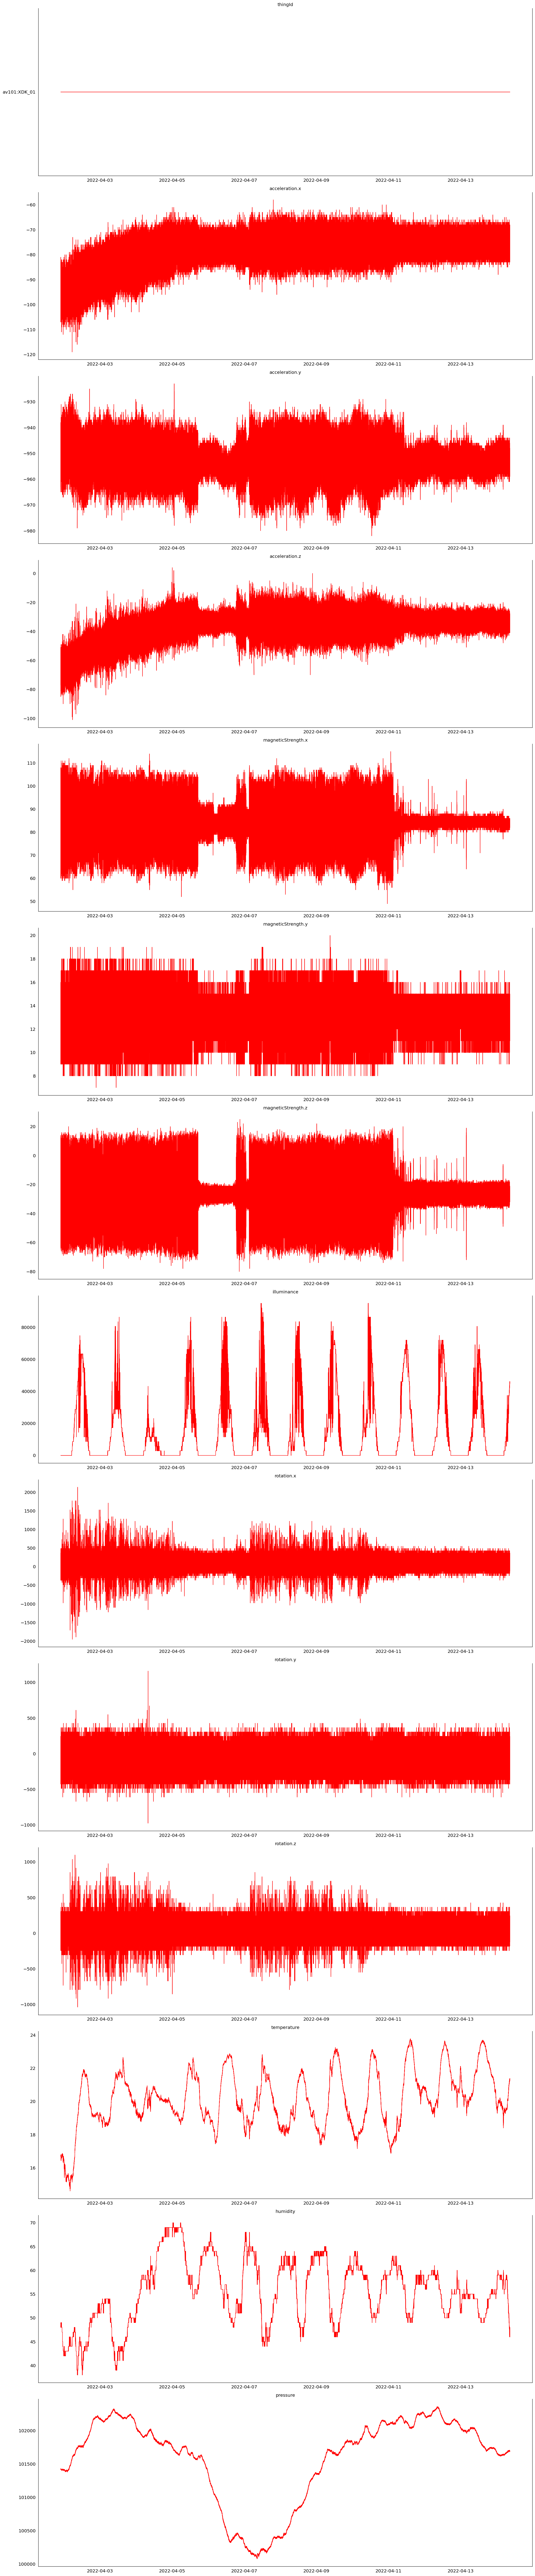

In [13]:
# Plot
fig, axes = plt.subplots(nrows=14, ncols=1, dpi=120, figsize=(20,96))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=12)

plt.tight_layout();